In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datafiles/cinema.csv')

In [3]:
df.head()

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227
3,1499,261.0,578,8250.485081,0,9658
4,1164,209.0,683,10908.539550,0,9286


In [4]:
df.isnull().any(axis=0)

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

In [5]:
df2 = df.fillna(df.mean())

In [6]:
df2.isnull().any(axis=0)

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

In [7]:
%matplotlib inline

<AxesSubplot:xlabel='SNS2', ylabel='sales'>

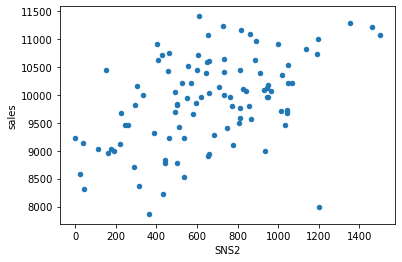

In [9]:
df2.plot(kind = 'scatter', x = 'SNS2',y='sales')

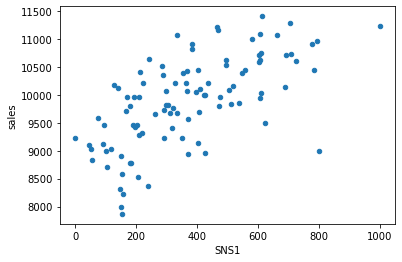

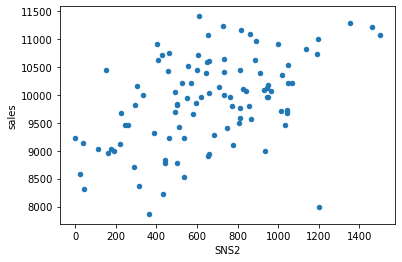

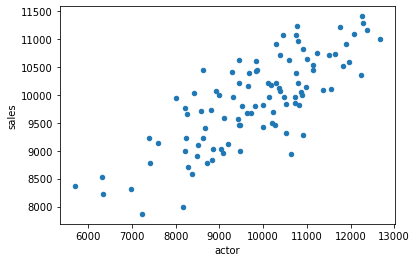

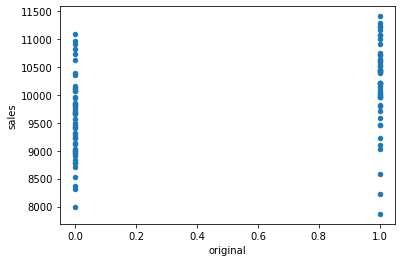

In [11]:
for name in df.columns:
    if name == 'cinema_id' or name == 'sales':
        continue
    df2.plot(kind= 'scatter', x = name, y = 'sales')

In [12]:
df[(df['SNS2'] > 1000 ) & (df['sales'] < 8500)]

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


In [15]:
no = df2[(df2['SNS2'] > 1000) & (df2['sales'] < 8500)].index

In [14]:
no 

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


In [16]:
no

Int64Index([30], dtype='int64')

In [17]:
df3 = df2.drop(0)

In [18]:
df3

,cinema_id,SNS1,SNS2,actor,original,sales
1,1000,363.000000,568,10290.709370,1,10210
2,1390,158.000000,431,6340.388534,1,8227
3,1499,261.000000,578,8250.485081,0,9658
4,1164,209.000000,683,10908.539550,0,9286
5,1009,370.737374,866,9427.214520,0,9574
...,...,...,...,...,...,...
95,1260,494.000000,1050,11137.482810,1,10537
96,1283,505.000000,928,11376.038540,1,10084
97,1861,368.000000,966,10393.252480,0,10069
98,1006,326.000000,1068,9454.019853,1,10218


In [19]:
df3.shape

(99, 6)

In [20]:
x = df3.loc[:,'SNS1':'original']

In [21]:
t = df3['sales']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,t,test_size=0.2,random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
new = [[150,70,300,0]]

In [28]:
model.predict(new)

C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6387.4011634])

In [29]:
model.score(x_test,y_test)

0.832392641230078

In [30]:
from sklearn.metrics import mean_absolute_error

In [32]:
pred = model.predict(x_test)

In [34]:
mean_absolute_error(y_pred = pred, y_true=y_test)

249.64028886627256

In [35]:
import pickle

In [36]:
with open('cinema.pkl', 'wb') as f:
    pickle.dump(model,f)
    

In [37]:
tmp = pd.DataFrame(model.coef_)

In [38]:
tmp.index = x_train.columns

In [39]:
tmp

,0
SNS1,1.193077
SNS2,0.397778
actor,0.300503
original,262.502125


In [40]:
model.intercept_

6090.44426305681

In [41]:
df = pd.read_csv('datafiles/ex3.csv')

In [42]:
df.head()

,x0,x1,x2,x3,target
0,1.000943,2.114344,-1.148213,-0.051415,77.147293
1,1.505901,-0.626081,3.041686,-0.587336,278.595852
2,-0.390320,0.283607,-0.940359,-2.154124,-71.039904
3,-0.167273,1.413624,-0.632571,-1.016131,42.193870
4,-0.728801,1.370530,0.168298,-1.203904,89.167955


In [43]:
df.isnull().any(axis=0)

x0         True
x1        False
x2         True
x3        False
target    False
dtype: bool

In [45]:
df2 = df.fillna(df.median())

In [46]:
df2.isnull().any(axis=0)

x0        False
x1        False
x2        False
x3        False
target    False
dtype: bool

<AxesSubplot:xlabel='x0', ylabel='target'>

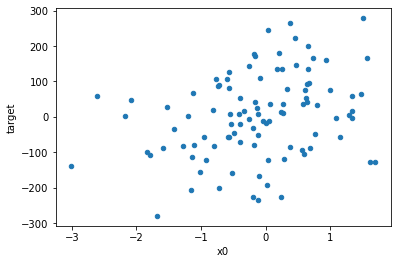

In [47]:
df2.plot(kind='scatter', x = 'x0', y = 'target')

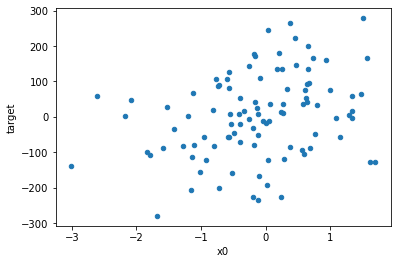

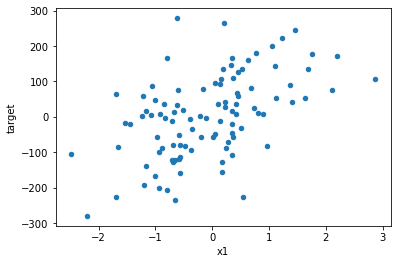

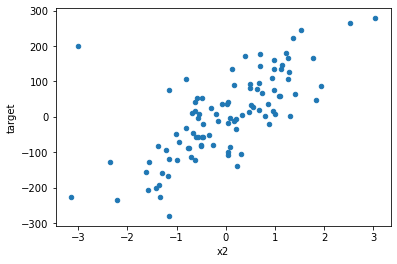

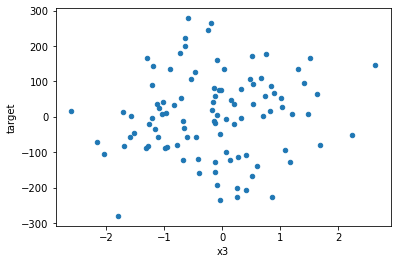

In [48]:
for name in df2.columns:
    if name == 'target':
        continue
    df2.plot(kind='scatter', x = name, y = 'target')

In [50]:
df2[(df2['x2'] < -2) & (df2['target'] > 100)]

,x0,x1,x2,x3,target
23,0.652769,1.057642,-3.0,-0.644467,200.0


In [51]:
df3 = df2.drop(23)

In [52]:
x = df3.loc[:, 'x0':'x3']

In [53]:
t = df3['target']

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,t,test_size=0.2,random_state=0)

In [56]:
model = LinearRegression()

In [57]:
model.fit(x_train,y_train)

LinearRegression()

In [58]:
tmp = model.predict(x_test)

In [59]:
model.score(x_test,y_test)

0.9978768275384675

In [60]:
model.coef_

array([31.87246074, 62.6636386 , 87.74225813, -0.3618206 ])

In [61]:
mean_absolute_error(y_pred = tmp, y_true = y_test)

4.065920844848206